<a href="https://colab.research.google.com/github/bahadirbesirkestane/Staj/blob/main/Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Python'da Spark ile Büyük Veri İşleme**

In [ ]:
!pip install findspark

In [ ]:
import findspark

In [ ]:
findspark.init("C:\spark")

In [ ]:
from pyspark import SparkContext

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [ ]:
spark=SparkSession.builder \
        .master("local") \
        .appName("pysaprk_giris") \
        .getOrCreate()

sc=spark.sparkContext

In [ ]:
sc

<SparkContext master=local appName=pysaprk_giris>

In [ ]:
sc.version

'3.5.0'

In [ ]:
sc.appName

'pysaprk_giris'

>Her açılan sparkın bilgisayar kapanmadan durudurulması gerekir.

In [ ]:
#sc.stop()

# Temel Dataframe işlemleri

In [ ]:
spark_df=spark.read.csv("C:/Users/O M E N/Masaüstü/Ogrenimler/jupiterBigData/churn.csv",header=True,inferSchema=True)

In [ ]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [ ]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [ ]:
spark_df.show(5,truncate=True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [ ]:
spark_df.count()

900

In [ ]:
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [ ]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [ ]:
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [ ]:
spark_df.select("Age","Names").show()

+----+-------------------+
| Age|              Names|
+----+-------------------+
|42.0|   Cameron Williams|
|41.0|      Kevin Mueller|
|38.0|        Eric Lozano|
|42.0|      Phillip White|
|37.0|     Cynthia Norton|
|48.0|   Jessica Williams|
|44.0|        Eric Butler|
|32.0|      Zachary Walsh|
|43.0|        Ashlee Carr|
|40.0|     Jennifer Lynch|
|30.0|       Paula Harris|
|45.0|     Bruce Phillips|
|45.0|       Craig Garner|
|40.0|       Nicole Olson|
|41.0|     Harold Griffin|
|38.0|       James Wright|
|45.0|      Doris Wilkins|
|43.0|Katherine Carpenter|
|53.0|     Lindsay Martin|
|46.0|        Kathy Curry|
+----+-------------------+
only showing top 20 rows



In [ ]:
spark_df.filter(spark_df.Age > 40).show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0|    1|
| 11|     Bruce Phillips|45.0|       8771.02|              1| 6.64|     11.0|    1|
| 12|       Craig Garner|45.0|       8988.67|              1| 4.84|     11.0|    1|
| 14|     Harold Griffin|41.0|       6569.87|              1|  4.3|     11.0

In [ ]:
spark_df.groupby("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [ ]:
spark_df.groupby("Churn").agg({"Age":"mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



> Büyük veride Görselleştirme

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sdf=spark_df.toPandas()
sdf.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


<Axes: xlabel='Churn'>

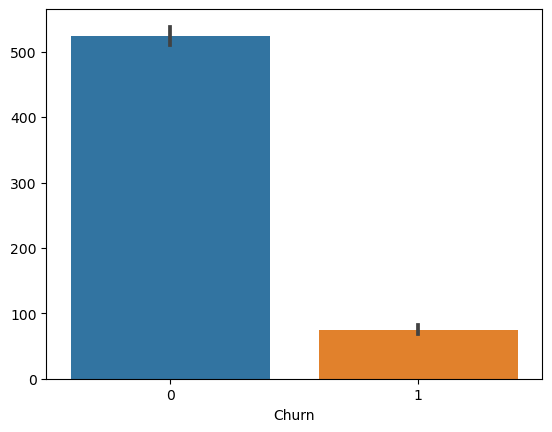

In [ ]:
sns.barplot(x="Churn",y=sdf.Churn.index,data=sdf)

In [ ]:
a=spark_df.groupby("Churn").count().toPandas()
a

,Churn,count
0,1,150
1,0,750


In [ ]:
type(a)

pandas.core.frame.DataFrame

#Makine Öğrenmesi

In [ ]:
spark_df=spark.read.csv("C:/Users/O M E N/Masaüstü/Ogrenimler/jupiterBigData/churn.csv",header=True,inferSchema=True)

In [ ]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



> İsimlendirmelerin standatrlaştırılması

In [ ]:
spark_df=spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [ ]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [ ]:
spark_df=spark_df.withColumnRenamed("_c0","index")

In [ ]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [ ]:
spark_df.count()

900

In [ ]:
spark_df.select("age","total_purchase","account_manager","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
churn,900,0.16666666666666666,0.3728852122772358,0,1


>Veri Ön İşleme

In [ ]:
spark_df=spark_df.dropna()

In [ ]:
spark_df=spark_df.withColumn("age_kare",spark_df.age**2)

In [ ]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 5 rows



## Bağımlı değişken belirtme

In [ ]:
from pyspark.ml.feature import StringIndexer

In [ ]:
stringIndexer=StringIndexer(inputCol="churn",outputCol="label")
mod=stringIndexer.fit(spark_df)
indexed=mod.transform(spark_df)
spark_df=indexed.withColumn("label",indexed["label"].cast("integer"))

In [ ]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 5 rows



## Bağımsız değişkenler

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [ ]:
bagismsiz_degiskenler=["age","total_purchase","account_manager","years","num_sites"]

In [ ]:
vectorAssembler=VectorAssembler(inputCols=bagismsiz_degiskenler,outputCol="features")
va_df=vectorAssembler.transform(spark_df)
va_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|            features|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|[42.0,11066.8,0.0...|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|[41.0,11916.22,0....|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|[38.0,12884.75,0....|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|[42.0,8010.76,0.0...|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|    1|[37.0,9191.58,0.0...|
+-----+----------------+----+--------------+----

In [ ]:
final_df=va_df.select(["features","label"])
final_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
+--------------------+-----+
only showing top 5 rows



> train ve test işlemleri

In [ ]:
splits=final_df.randomSplit([0.70,0.30])
train_df=splits[0]
test_df=splits[1]

In [ ]:
train_df

DataFrame[features: vector, label: int]

In [ ]:
test_df

DataFrame[features: vector, label: int]

## GBM Algoritması ile Müşteri Kaybı Modellemesi  

In [ ]:
from pyspark.ml.classification import GBTClassifier

In [ ]:
gbm=GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")

In [ ]:
gbm_model=gbm.fit(train_df)

In [ ]:
y_pred=gbm_model.transform(test_df)
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [ ]:
ac=y_pred.select("label","prediction")

In [ ]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8641509433962264

## Model Tuning

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator=BinaryClassificationEvaluator()

paramGrid=(ParamGridBuilder()
           .addGrid(gbm.maxDepth,[2,4,6])
           .addGrid(gbm.maxBins,[20,30])
           .addGrid(gbm.maxIter,[10,20])
           .build())

cv=CrossValidator(estimator=gbm,estimatorParamMaps=paramGrid,evaluator=evaluator,numFolds=10)

In [ ]:
cvModel=cv.fit(train_df)

In [ ]:
y_pred=cvModel.transform(test_df)

In [ ]:
ac=y_pred.select("label","prediction")

In [ ]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8754716981132076